# Rasterio
### Extracting cross sections from the pointcloud using rasterio

please note: the enviroment should be switched to the rasterio env.  
Sten Schurer

In [2]:
import rasterio
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#### load the X and Y coordinates of the cross section

In [3]:
# XL = 200290.51
# YL = 8340535.19
# XR = 200801.76
# YR = 8340651.31

# Xstep = (XR - XL)/1000
# Ystep = (YR - YL)/1000
# X     = 0

# for i in range(1000):
#     YL += Ystep
#     print(YL)
    
X = pd.read_csv(os.path.join(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Bathymetry/CrossS2_X.txt'))
Y = pd.read_csv(os.path.join(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Bathymetry/CrossS2_Y.txt'))
XY = pd.concat([X, Y], axis=1, sort=False)
XY.columns = (['X', 'Y'])
print(XY)

XX = pd.read_csv(os.path.join(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Bathymetry/CrossS3_X.txt'))
YY = pd.read_csv(os.path.join(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Bathymetry/CrossS3_Y.txt'))
XY2 = pd.concat([XX, YY], axis=1, sort=False)
XY2.columns = (['X', 'Y'])
print(XY2)

XXX = pd.read_csv(os.path.join(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Bathymetry/X.txt'))
YYY = pd.read_csv(os.path.join(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Bathymetry/Y.txt'))
XY3 = pd.concat([XXX, YYY], axis=1, sort=False)
XY3.columns = (['X', 'Y'])
print(XY3)

                X             Y
0    200258.59098  8.340685e+06
1    200259.10147  8.340685e+06
2    200259.61196  8.340685e+06
3    200260.12245  8.340685e+06
4    200260.63294  8.340686e+06
..            ...           ...
994  200766.01804  8.340790e+06
995  200766.52853  8.340790e+06
996  200767.03902  8.340790e+06
997  200767.54951  8.340790e+06
998  200768.06000  8.340790e+06

[999 rows x 2 columns]
                X             Y
0    200291.53250  8.340535e+06
1    200292.04375  8.340536e+06
2    200292.55500  8.340536e+06
3    200293.06625  8.340536e+06
4    200293.57750  8.340536e+06
..            ...           ...
994  200799.71500  8.340651e+06
995  200800.22625  8.340651e+06
996  200800.73750  8.340651e+06
997  200801.24875  8.340651e+06
998  200801.76000  8.340651e+06

[999 rows x 2 columns]
              X            Y
0    200428.102  8339883.098
1    200428.653  8339883.147
2    200429.204  8339883.196
3    200429.755  8339883.245
4    200430.306  8339883.294
..        

#### Load the pointcloud and extract Z

In [4]:
dataset = rasterio.open(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Bathymetry/complete_bathymetry.tif')

track_xy = XY

Z = np.array([x[0] for x in  rasterio.sample.sample_gen(dataset, track_xy.values, indexes=None)])

print(Z.min())

348.9219665527344


In [5]:
dataset = rasterio.open(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Bathymetry/complete_bathymetry.tif')

track_xy = XY2

Z2 = np.array([x[0] for x in  rasterio.sample.sample_gen(dataset, track_xy.values, indexes=None)])

print(Z2.min())

349.75384521484375


In [8]:
dataset = rasterio.open(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Bathymetry/complete_bathymetry.tif')

track_xy = XY3

Z3 = np.array([x[0] for x in  rasterio.sample.sample_gen(dataset, track_xy.values, indexes=None)])

print(Z3.min())

350.00390625


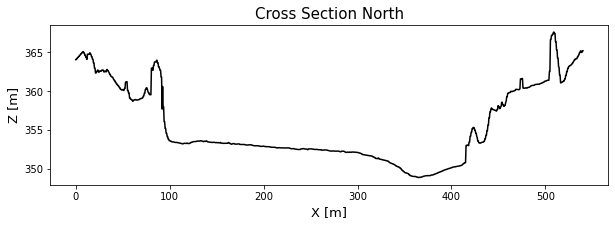

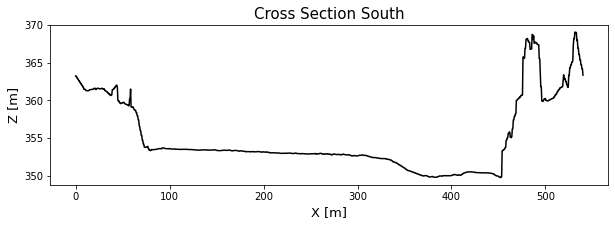

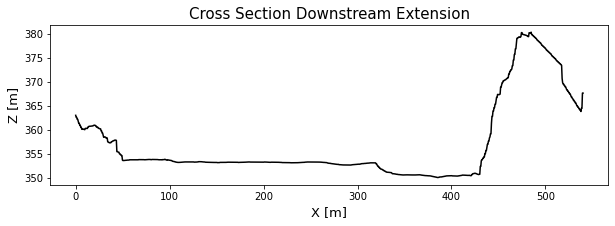

In [29]:
plt.figure(figsize=(10, 10))
plt.subplot(311)
width = np.linspace(0, 540, 999)
plt.ylabel('Z [m]', fontsize=13)
plt.xlabel('X [m]', fontsize=13)
plt.title('Cross Section North', fontsize=15)
plt.plot(width, Z, 'k')

plt.figure(figsize=(10, 10))
plt.subplot(312)
width = np.linspace(0, 540, 999)
plt.xlabel('X [m]', fontsize=13)
plt.ylabel('Z [m]', fontsize=13)
plt.title('Cross Section South', fontsize=15)
plt.plot(width, Z2, 'k')

plt.figure(figsize=(10, 10))
plt.subplot(313)
width = np.linspace(0, 540, 999)
plt.xlabel('X [m]', fontsize=13)
plt.ylabel('Z [m]', fontsize=13)
plt.title('Cross Section Downstream Extension', fontsize=15)
plt.plot(width, Z3, 'k')

# #rectangle 1
# V1 = np.linspace(353, 350, 10)
# X1 = np.linspace(320, 320, 10)
# X2 = np.linspace(430, 430, 10)
# H1 = np.linspace(320, 430, 100)
# X3 = np.linspace(350, 350, 100)

# plt.plot(X1, V1, 'r', linewidth =(3), label='Section 1')
# plt.plot(X2, V1, 'r', linewidth =(3))
# plt.plot(H1, X3, 'r', linewidth =(3))

# #rectangle2
# V  = np.linspace(358, 353, 10)
# X  = np.linspace(47, 47, 10)
# H  = np.linspace(47, 430, 1000)
# XX = np.linspace(353, 353, 1000)

# plt.plot(X, V, 'b', linewidth =(3), label='Section 2')
# plt.plot(X2, V, 'b', linewidth =(3))
# plt.plot(H, XX, 'b', linewidth =(3))
# plt.legend();
plt.savefig(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/TNDTT/Oasis/Figures/Cross_sections.png')